In [10]:
import pandas as pd


df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
df["bmi"].value_counts

<bound method IndexOpsMixin.value_counts of 0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64>

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for e in ['sex', 'smoker', 'region'] :
    df[e] = label_encoder.fit_transform(df[e])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [191]:
X = df.drop('bmi', axis=1)
Y = df["bmi"]

X, Y

(      age  sex  children  smoker  region      charges
 0      19    0         0       1       3  16884.92400
 1      18    1         1       0       2   1725.55230
 2      28    1         3       0       2   4449.46200
 3      33    1         0       0       1  21984.47061
 4      32    1         0       0       1   3866.85520
 ...   ...  ...       ...     ...     ...          ...
 1333   50    1         3       0       1  10600.54830
 1334   18    0         0       0       0   2205.98080
 1335   18    0         0       0       2   1629.83350
 1336   21    0         0       0       3   2007.94500
 1337   61    0         0       1       1  29141.36030
 
 [1338 rows x 6 columns],
 0       27.900
 1       33.770
 2       33.000
 3       22.705
 4       28.880
          ...  
 1333    30.970
 1334    31.920
 1335    36.850
 1336    25.800
 1337    29.070
 Name: bmi, Length: 1338, dtype: float64)

In [193]:
y = pd.get_dummies(Y).values
y

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.43876426, -1.0105187 , -0.90861367,  1.97058663,  1.34390459,
         0.2985838 ],
       [-1.50996545,  0.98959079, -0.07876719, -0.5074631 ,  0.43849455,
        -0.95368917],
       [-0.79795355,  0.98959079,  1.58092576, -0.5074631 ,  0.43849455,
        -0.72867467],
       ...,
       [-1.50996545, -1.0105187 , -0.90861367, -0.5074631 ,  0.43849455,
        -0.96159623],
       [-1.29636188, -1.0105187 , -0.90861367, -0.5074631 ,  1.34390459,
        -0.93036151],
       [ 1.55168573, -1.0105187 , -0.90861367,  1.97058663, -0.46691549,
         1.31105347]])

In [206]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0) 
X_train.shape, X_test.shape,  y_train.shape, y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

In [208]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10,input_shape=(6,),activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile('adam','mse',metrics=['mse'])

model.summary()

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_86 (Dense)                     │ (None, 10)                  │              70 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_87 (Dense)                     │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_88 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_89 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406 (1.59 KB)

 Trainable params: 406 (1.59 KB)

 Non-trainable params: 0 (0.00 B)

In [210]:
import numpy as np

model_history=model.fit(x=X_train, y=y_train, epochs=60, batch_size=32,validation_split=0.1)
# model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 966.2582 - mse: 966.2582 - val_loss: 856.0568 - val_mse: 856.0568
Epoch 2/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 953.0403 - mse: 953.0403 - val_loss: 811.3321 - val_mse: 811.3321
Epoch 3/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 899.1553 - mse: 899.1553 - val_loss: 740.5225 - val_mse: 740.5225
Epoch 4/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 799.2295 - mse: 799.2295 - val_loss: 623.4907 - val_mse: 623.4907
Epoch 5/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 659.2018 - mse: 659.2018 - val_loss: 457.2051 - val_mse: 457.2051
Epoch 6/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 473.2708 - mse: 473.2708 - val_loss: 279.7367 - val_mse: 279.7367
Epoch 7/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 284.3663 - mse: 284.3663 - val_loss: 155.6999 - val_mse: 155.6999
Epoch 8/60
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 150.8176 - mse: 150.8176 - val_loss: 104.4481 - val_mse: 104.4481
Epoch 9/

ValueError: `axis` must be fewer than the number of dimensions (1)

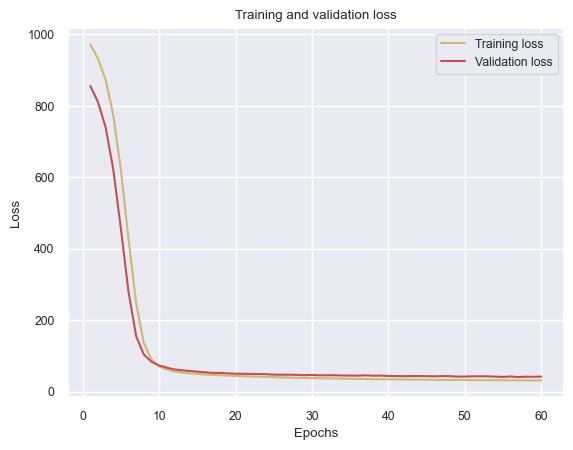

In [212]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

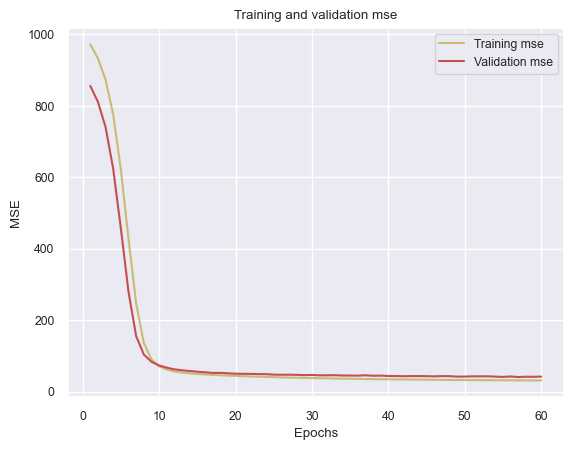

In [214]:
acc =model_history.history['mse']
val_mse =model_history.history['val_mse']
plt.plot(epochs, acc, 'y', label='Training mse')
plt.plot(epochs, val_mse, 'r', label='Validation mse')
plt.title('Training and validation mse')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [216]:
model.evaluate(X_test, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29.3267 - mse: 29.3267 


[27.71088409423828, 27.71088409423828]